# Bayesian_learning 2 - intro to Gaussian processes

**Notebook putting the excellent Machine lectures of Nando de Freitas in code/(LA)tex(t). **
We are dealing with Bayesian learning and Gaussian processes in particular.

slides on:
http://www.cs.ubc.ca/~nando/540-2013/lectures/l6.pdf

In [77]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.display import Image

# path to png's
PATH = 'C:\\Users\\Egbert\\datascience\\ubc_ml\\tut_png\\bayesian_learning\\'

- Intro:

Suppose we have a cloud of points describing the realizations of 2 variables X1, X2 (weight, height). You might get measurements that look either as in example 1) or in example 2):

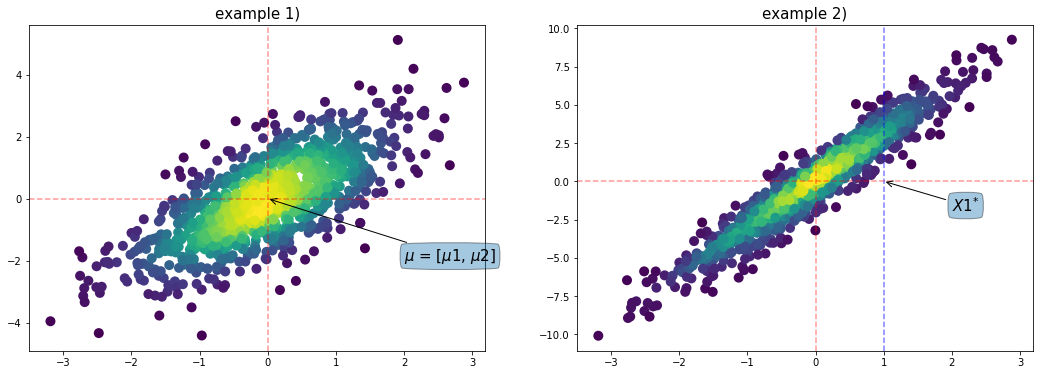

In [2]:
from scipy.stats import gaussian_kde

fig,ax = plt.subplots(1,2, figsize= [18,6])
# Generate fake data
x = np.random.normal(size=1000)
y1 = x + np.random.normal(size=1000)
y2 = x * 3 + np.random.normal(size=1000)

# Calculate the point density
xy1 = np.vstack([x,y1]); z1 = gaussian_kde(xy1)(xy1)
xy2 = np.vstack([x,y2]); z2 = gaussian_kde(xy2)(xy2)

ax[0].scatter(x, y1, c=z1, s=100, edgecolor='')
ax[0].axvline(x=0, linestyle ='--', color='red', alpha=.4)
ax[0].axhline(y=0, linestyle ='--', color='red', alpha=.4)
ax[0].set_title('example 1)', size=15)

ax[0].annotate('$\mu$ = [$\mu1$, $\mu2$]', xy = (0,0), xytext = (2,-2), 
               size= 15, bbox = dict(boxstyle = "round4", alpha=.4), 
               arrowprops = dict(arrowstyle = '->'))

ax[1].scatter(x, y2, c=z2, s=100, edgecolor='')
ax[1].axvline(x=0, linestyle ='--', color='red', alpha=.4)
ax[1].axvline(x=1, linestyle ='--', color='blue', alpha=.5)
ax[1].axhline(y=0, linestyle ='--', color='red', alpha=.4)
ax[1].set_title('example 2)', size=15)

ax[1].annotate('$X1^{*}$', xy = (1,0), xytext = (2,-2), 
               size= 15, bbox = dict(boxstyle = "round4", alpha=.4), 
               arrowprops = dict(arrowstyle = '->'))

When we use multivariate Gaussians, we will essentially fit Gaussians to the data. In **_example 1)_** we might want to choose a Gaussian that is centered at the origin with seeminlgy a $\mu = 0$ and some covariance that is +/- circular. In example 2) this is more an ellipsis: the $\mu$ and the size of the ellipse describe the data.

In matrix notation we write $ \begin{bmatrix} X1 \\ X2 \end{bmatrix} \sim \mathcal{N} \bigg(\begin{bmatrix} 0 \\ 0 \end{bmatrix}, \begin{bmatrix} 1 & 0\\ 0 &1 \end{bmatrix}\bigg)$ where the first bmatrix contains the $\mu = 0, 0 $ because it's centered at origin. The second bmatrix shows how the points are related to each other: how does an increase in X1 affect X2 described by **correlation** or equivalently **covariance**. 

Standard devation is the square root of the variance: $\sigma \hspace{1mm} of \hspace{1mm} X1= \sqrt {\mu _2 } = \sqrt {\mathbb{E}(X1^{2})}$ where $\mathbb{E}$ is the Expected Value (mean)

In **_example 2_** we have :

$ \begin{bmatrix} X1 \\ X2 \end{bmatrix} \sim \mathcal{N} \bigg(\begin{bmatrix} 0 \\ 0 \end{bmatrix}, \begin{bmatrix} 1 & 0.5\\ 0.5 & 1 \end{bmatrix}\bigg)$ The covariance is essentially the **dotproduct** of X1, X2. In this case, if we take a particular value $X1^{*}$ -see fig.-, I know X2 is positive because the points are positively correlated. In the first example where the points are circular,we don't have that information.

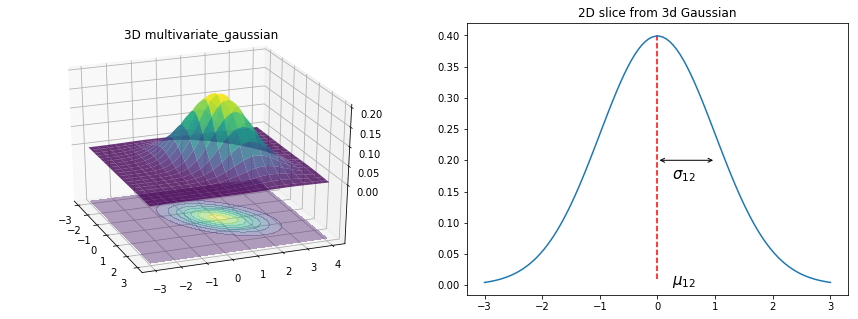

In [73]:
# source Scipy.org
from mpl_toolkits.mplot3d import Axes3D
# Our 2-dimensional distribution will be over variables X and Y
N = 60
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 4, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 1.])
Sigma = np.array([[ 1. , 0.5], [0.5,  1]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis, alpha=.8)
cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis, alpha=.4)

# Adjust the limits, ticks and view angle
ax.set(zlim= (-0.15,0.2), zticks = (np.linspace(0,0.2,5)), title = '3D multivariate_gaussian')
ax.view_init(27, -21)

# second plot representing an imaginary hyperplane slice through the multivariate Gaussian
ax = fig.add_subplot(122)
mu, variance = 0,1
sigma = math.sqrt(variance)
x = np.linspace(mu-3*variance,mu+3*variance, 100)
ax.plot(x,mlab.normpdf(x, mu, sigma))
ax.vlines(x=0, ymin=0.01, ymax=.4, linestyle='--', color='red')
ax.annotate('$\mu_{12}$', xy=(0.25,0), size=15)
ax.annotate(s='', xy=(1,.2), xytext=(0,.2), arrowprops=dict(arrowstyle='<->'))
ax.annotate('$\sigma_{12}$', xy=(0.25,0.17), size=15)
ax.set(title= '2D slice from 3d Gaussian')

Imagine slicing the 3D Guassian at a particular value X1 with a cutting hyperplane. 

$ \begin{bmatrix} X1 \\ X2 \end{bmatrix} \sim \mathcal{N} \bigg(\begin{bmatrix} \mu1 \\ \mu2 \end{bmatrix}, \begin{bmatrix} \sigma11 & \sigma12\\ \sigma21 & \sigma22 \end{bmatrix}\bigg)$ is the Gaussian that describes this cloud of points. The sigma for a 1D Gaussian is the width of the Gaussian and is positive otherwise it would collapse. Now I might want to know the $\mu_{12}$ and its width $\sigma_{12}$ of the Blue Gaussian on the right. What if we had to calculate these from the original model (where we know the average)? We already know how to use MLE to fit a Gaussian to a cloud of points, we know how to estimate a mean and the variance by using the sample variance estimate. How to do it for the blue curve?

This requires derivations based on the idea of the inverse matrix Lemma and lots of Algebra. Let's assume the Theorem is given to us by: $\mu_{12} = \mu_{1} + \Sigma_{12}(X_{2}-\mu_{2})$. It allows you to go from a joint distribution to a conditional distribution. 

iow: how would you go about generating a random vector that conforms to a multivariate Gaussian?

While this may sound like a bunch of big words, the intuitive idea behind all of this is: How do I generate numbers that belong the the classic Bell curve shape of the Gaussian.

**Generating 1d Gaussian random numbers**

Each floating point number between 0 and 1 has equal probability of showing up = uniform randomness. If we want to convert this number into a Gaussian random number, we need to make use of the **Central Limit Theorem**

Let's say you generate *m* uniform random numbers (between 0,1) and you use the variable $x_{i}$ to denote each of these. The Central Limit Theorem allows us to convert these m numbers belonging to $\mathbf{U}(0,1)$ into a single number that belongs to the Gaussian distribution $\mathcal{N}(0,1)$.

$x = \frac {\sum_{i}x_{i} - \frac{m}{2}} {\sqrt{\frac{m}{12}}}$

Here, $x$ is a one dimensional Gaussian random number - produced using the help of m uniform random variables. The $\frac{m}{2}$ is derived from the term $m\mu_{u}$ (where $\mu_{u}$ is the mean of the uniform distribution - $\frac{1- 0}{2} = .5$). As $m\rightarrow\infty$, we get that $x\rightarrow \mathcal{N}(0,1)$. Thus, the more uniform random numbers you use, the more accurate the "conversion" to Gaussian would be.

**Generating a multivariate Gaussian random number**

Generating an n-d Gaussian random number, we can run do the previous section n times giving us n numbers centered around 0 and independent of each other. This means, the n-d Gaussian random number generated belongs to $\mathcal{N}(0,1)$. Here 0 is an n-dimensional zero vector and $\mathcal{I}_{n}$ is a $n x n$ identity matrix (the covariance matrix describing independent components).

This is the known Gaussian distribution. Now, we need to somehow transform this into the Gaussian distribution described by the mean and covariance matrix supplied by the user.

**Linear algebra on the Gaussian distribution**

Transforming the Gaussian into the distribution we want is a simple 2-step linear transformation. 

- First, lining up covariance matrix: The Gaussian distribution we have at the moment is perfectly spherical (in n-dimensions), centered at the origin. To move towards the Covariance matrix we want, we would need to squash this spherical distribution and maybe rotate it a little bit (to get some correlation). This can be accomplished by calculating the eigenvectors and eigenvalues of the given covariance matrix and transforming the random number by matrix multiplication.

$y^{'} = \lambda^{\frac{1}{2}}\phi x$

$y^{'}$ is the transformed random number. Lambda is the diagonal matrix made up of the eigenvalues of Sigma and $\phi$ is the matrix of eigenvectors (each column is an eigenvector of Sigma).

- second step: **At this point, the covariance of the random number is in sync with Sigma but we also need to sync up the mean**. This is straightforward: we just add it: $y = y^{'}+\mu$. Voila: answer of this equation y is a Gaussian random number that belongs to the Gaussian distribution with the desired mean and covariance.

In [1]:
def get_1d_gaussian():
    """
    We define a function that generates a 1D Gaussian random number
    m: the higher m, the more random numbers to generate a single Gaussian.
    """
    m= 0 
    while m ==0:
        m = round(np.random.random() * 100)
        
    n = np.random.random(int(m))
    summation = float(np.sum(n))
    gaussian = (summation - m/2) / math.sqrt(m/12.0)

    return gaussian

In [7]:
def generate_known_gaussian(dimensions):
    """
    generate several n-dimensional Gaussian random numbers with a 
    zero mean and identity covariance
    """
    count = 1000

    ret = []
    for i in range(count):
        current_vector = []
        for j in range(dimensions):
            g = get_1d_gaussian()
            current_vector.append(g)

        ret.append( tuple(current_vector) )

    return ret

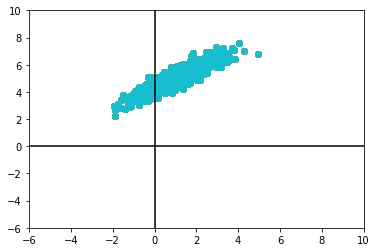

In [12]:
def main():
    known = generate_known_gaussian(2)
    target_mean = np.matrix([ [1.0], [5.0]])
    target_cov  = np.matrix([[  1.0, 0.7], 
                             [  0.7, 0.6]])

    [eigenvalues, eigenvectors] = np.linalg.eig(target_cov)
    
    l = np.matrix(np.diag(np.sqrt(eigenvalues)))
    Q = np.matrix(eigenvectors) * l
    
    x1_tweaked = [] # holds the transformed 1st dim
    x2_tweaked = [] # holds the transformed 2nd dim
    tweaked_all = [] # holds the entire vector.
    for i, j in known:
        """
        loop through all known random 2D vectors, unpack in i,j
        """
        original = np.matrix( [[i], [j]]).copy()
        # apply linear transformation: first lining up the covariance and then lining up the mean:
        tweaked = (Q * original) + target_mean 
        
        x1_tweaked.append(float(tweaked[0])) 
        x2_tweaked.append(float(tweaked[1])) 
        tweaked_all.append(tweaked)
        # scatter
        plt.scatter(x1_tweaked, x2_tweaked)
    plt.axis([-6, 10, -6, 10])
    plt.hlines(0, -6, 10)
    plt.vlines(0, -6, 10)
    plt.show()

if __name__ == "__main__":
    main()

Back to regression: Assume the following points are given:

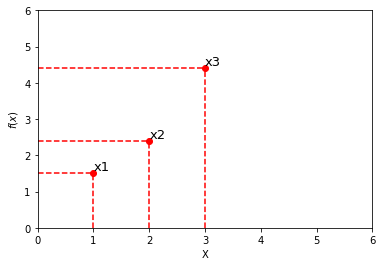

In [75]:
values =[[1,1.5],[2,2.4],[3,4.4]]
labels = ['x1', 'x2', 'x3']

fig, ax = plt.subplots()
ax.plot(*zip(*values), marker='o', color='r', ls='')

for v in values:
    ax.plot([v[0], v[0]], [0, v[1]], linestyle = '--', color='red')
    ax.plot([0, v[0]], [v[1], v[1]] ,linestyle = '--', color='red')

for i, label in enumerate(labels):
    ax.annotate(label, (values[i][0], values[i][1]), verticalalignment='bottom', size=13)

ax.set(xlabel = 'X', ylabel = '$f(x)$')
ax.axis([0,6, 0,6]);

Assume the x's are given and we want to model the f's with a multivariate Gaussian dsitribution. 
$ \begin{bmatrix} F1 \\ F2 \\ F3 \end{bmatrix} \sim \begin{bmatrix} 0 \\ 0 \\ 0 \end{bmatrix}, \begin{bmatrix} K11 & K12 & K13 \\ K21 & K22 & K23 \\ K31 & K21 & K31 \end{bmatrix}\bigg)$

Assume vector f has $u = 0$ and covriance matrix $K11, .. , K33$ that captures the relationship between the 3 points. X1 and X2 are quit near so it is to expected to show some correlation like:

$ \sim \begin{bmatrix} 0 \\ 0 \\ 0 \end{bmatrix}, \begin{bmatrix} 1 & 0.7 & 0.2 \\ 0.7 & 1 & 0.6 \\ 0.2 & 0.6 & 1 \end{bmatrix}\bigg)$

We saw before that matrices are cool and fast. So how can we construct a **matrix** that says X1 is highly correlates with X2? The way to do it is to let each element $K_{ij}$ be given by a **measure of similarity**. One way is the **squared exponential kernel** (exponantial and squaring a distance)

$K_{ij} = \mathcal{E}^{\lVert x_{i} - x_{j} \rVert ^{2}}$

$K_{ij} =
\begin{cases}
0,  & \lVert x_{i} - x_{j} \rVert ^{2} \rightarrow \infty \\
1, & x_{i} =x_{j}
\end{cases}$

So if I were to fill the matrix using such a similarity function I would end up with a good model to describe that cloud of points (or at least describe their heights because the x's are given and are used to describe K.)

Let's assume we have a point $x_{*}$ and we don't know its height $(f_{*} = ?)$

$D = \big\{(x_{1}, f_{1}), (x_{2}, f_{2}), (x_{3}, f_{3}) \big\} ==> f_{*} = ?$

If I know my $f_{*}$s are distributed by a Gaussian: $\underline{\mathcal{f}} \sim \mathcal{N}(0, K)$

where $\underline{\mathcal{f}}$ is the vector f is $f_{1}, f_{2}, f_{3}$, $\mu$ is 0 and K is the covariance matrix $\begin{bmatrix} 1 & 0.7 & 0.2 \\ 0.7 & 1 & 0.6 \\ 0.2 & 0.6 & 1 \end{bmatrix}$

The assumption we make is that $f_{0}$ also comes from a Gaussian with 0 mean. We assume that the test data comes from the same distribution as the traning data:

$f_{*} \sim \mathcal{N}(0, K(X_{*}, X_{*})$

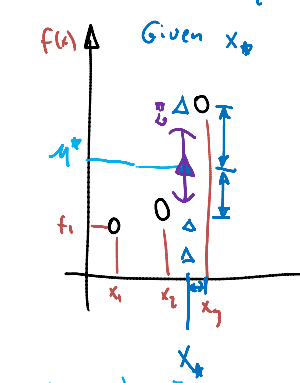

In [87]:
Image(filename = PATH + "gaussian_basics.png", width=300, height=50)

We want $f_{*}$ to be correlated so:

$ \begin{bmatrix} F \\ F_{*} \end{bmatrix} \sim \mathcal{N} \Bigg(0, \begin{bmatrix} K11 & K12 & K13 \begin{bmatrix} K1_{*} \end{bmatrix} \\ K21 & K22 & K23 \begin{bmatrix} K2_{*} \end{bmatrix} \\ K31 & K32 & K33 \begin{bmatrix} K3_{*} \end{bmatrix} \\ K_{*1} & K_{*2} & K_{*3} \begin{bmatrix} K_{**} \end{bmatrix} \end{bmatrix}\Bigg)$

where f.i $K_{1*} = K(X_{1}, X_{*})$ = the similarity between $X_{1}, X_{*}$. Now we end up with a **joint distribution** over $F, F_{*}$. If we are asked to give the conditional of $F_{*}$ fiven $F$ we use the **Gaussian Theorem**:

$F_{*} = K^{T}K^{-1}\mathcal{f}$